In [40]:
import pandas as pd
pd.options.display.max_rows = 100
import numpy as np

#### Задание 1

In [2]:
df = pd.read_csv('D:\\gRfn\\Learning\\Netology\\pandas\\mall\\ratings.csv')

In [3]:
df.head(5)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [4]:
def rating_class(rating_col):
    if rating_col <= 2:
        rating_col = 'низкий рейтинг'
    elif 2 < rating_col <= 4:
        rating_col = 'средний рейтинг'
    elif rating_col >= 4.5:
        rating_col = 'высокий рейтинг'
    return rating_col

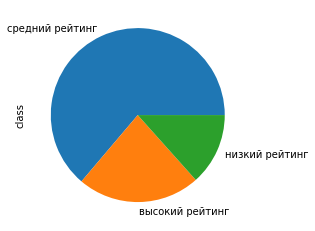

In [5]:
df['class'] = df['rating'].apply(rating_class)
df['class'].value_counts().plot.pie()

In [6]:
df['class'].value_counts()

средний рейтинг    63801
высокий рейтинг    22818
низкий рейтинг     13385
Name: class, dtype: int64

#### Задание 2

In [7]:
geo_data = {
'Центр': ['москва', 'тула', 'ярославль'],
'Северо-Запад': ['петербург', 'псков', 'мурманск'],
'Дальний Восток': ['владивосток', 'сахалин', 'хабаровск']}

In [8]:
def geo_test(words):
    for k, v in geo_data.items():
        for word in v:
            if word in words:
                return k
    return 'undefined'

In [9]:
df_key = pd.read_csv('D:\\gRfn\\Learning\\Netology\\pandas\\mall\\keywords.csv')

In [10]:
df_key['region'] = df_key['keyword'].apply(geo_test)

In [11]:
df_key['region'].value_counts()

undefined         99253
Центр               387
Северо-Запад        266
Дальний Восток       94
Name: region, dtype: int64

#### Задание 3

Есть мнение, что “раньше снимали настоящее кино, не то что сейчас”. Ваша задача проверить это утверждение, используя файлы с рейтингами фильмов из прошлого домашнего занятия (файл movies.csv и ratings.csv из базы https://grouplens.org/datasets/movielens). Т. е. проверить верно ли, что с ростом года выпуска фильма его средний рейтинг становится ниже.

При этом мы не будем затрагивать субьективные факторы выставления этих рейтингов, а пройдемся по следующему алгоритму:

В переменную years запишите список из всех годов с 1950 по 2010.

Напишите функцию production_year, которая каждой строке из названия фильма выставляет год выпуска. Не все названия фильмов содержат год выпуска в одинаковом формате, поэтому используйте следующий алгоритм:

для каждой строки пройдите по всем годам списка years
если номер года присутствует в названии фильма, то функция возвращает этот год как год выпуска
если ни один из номеров года списка years не встретился в названии фильма, то возвращается 1900 год
Запишите год выпуска фильма по алгоритму пункта 2 в новый столбец ‘year’

Посчитайте средний рейтинг всех фильмов для каждого значения столбца ‘year’ и отсортируйте результат по убыванию рейтинга

P/S/ все файлы находятся в архиве «дополнительные файлы к лекции и дз»

In [21]:
df_mov = pd.read_csv('D:\\gRfn\\Learning\\Netology\\pandas\\mall\\movies.csv')
df_rat = pd.read_csv('D:\\gRfn\\Learning\\Netology\\pandas\\mall\\ratings.csv')

In [ ]:
year = np.arange(1950, 2011, 1).tolist()
year = [str(int) for int in year]

In [55]:
def production_year(yea):
    for i in year:
        if i in yea:
            return i
    return '1900'

In [22]:
merge_df = pd.merge(df_mov, df_rat, how='left',on='movieId')
merge_df

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08
...,...,...,...,...,...,...
100058,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611.0,3.0,1.471524e+09
100059,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,NaN,NaN,NaN
100060,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,547.0,5.0,1.476419e+09
100061,164977,The Gay Desperado (1936),Comedy,NaN,NaN,NaN


In [54]:
merge_df['year'] = merge_df['title'].apply(production_year)
merge_df

,movieId,title,genres,userId,rating,timestamp,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7.0,3.0,8.518667e+08,1995
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,9.0,4.0,9.386292e+08,1995
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,13.0,5.0,1.331380e+09,1995
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15.0,2.0,9.979383e+08,1995
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19.0,3.0,8.551901e+08,1995
...,...,...,...,...,...,...,...
100058,162672,Mohenjo Daro (2016),Adventure|Drama|Romance,611.0,3.0,1.471524e+09,1900
100059,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi,NaN,NaN,NaN,1900
100060,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,547.0,5.0,1.476419e+09,1900
100061,164977,The Gay Desperado (1936),Comedy,NaN,NaN,NaN,1900


In [64]:
merge_df.groupby(['year'])['rating'].mean()

year
1900    3.602960
1950    3.915254
1951    3.983539
1952    4.000000
1953    3.754587
1954    3.994220
1955    3.751724
1956    3.617647
1957    4.014241
1958    3.823171
1959    3.841033
1960    3.809211
1961    3.663851
1962    3.952446
1963    3.705966
1964    3.841492
1965    3.678715
1966    3.736726
1967    3.814516
1968    3.737844
1969    3.817376
1970    3.700000
1971    3.748830
1972    4.011136
1973    3.806667
1974    3.978704
1975    3.823077
1976    3.806794
1977    3.905786
1978    3.549003
1979    3.777966
1980    3.708816
1981    3.758763
1982    3.638306
1983    3.657635
1984    3.651486
1985    3.588998
1986    3.528265
1987    3.606015
1988    3.552990
1989    3.534349
1990    3.449169
1991    3.628265
1992    3.466754
1993    3.536664
1994    3.537963
1995    3.472118
1996    3.426600
1997    3.415764
1998    3.472754
1999    3.471692
2000    3.356104
2001    3.460052
2002    3.456297
2003    3.444777
2004    3.491490
2005    3.448434
2006    3.511478
2007    3